<span style="color:red;  font-weight:bold; font-size:180%">  아이리스 품종을 분류하고 예측하는 딥러닝 </span> 

<span style="color:blue;  font-weight:bold; font-size:160%"> 1. 라이브러리 임포트하기  </span>     

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder  # 텍스트 형식의 클래스를 숫자로 변환하기 위해서 필요합니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager   # 한글 사용을 위해서 임포트합니다. 
import numpy as np
import tensorflow as tf

● tensorflow  버전 확인하기

In [2]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.9.1


<span style="color:magenta;  font-weight:bold; font-size:160%"> ● tensorboard 임포트 후 버전 확인하기 </span>  

In [3]:
import tensorboard

tensorboard.__version__

'2.9.0'

<span style="color:blue;  font-weight:bold; font-size:160%"> 2. 데이터셋 가져오기 </span>     

In [4]:
#df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df = pd.read_csv('iris.csv', names = ["꽃받침길이", "꽃받침넓이", "꽃잎길이", "꽃잎넓이", "종류"])
df

꽃받침길이  꽃받침넓이  꽃잎길이  꽃잎넓이              종류
0      5.1    3.5   1.4   0.2     Iris-setosa
1      4.9    3.0   1.4   0.2     Iris-setosa
2      4.7    3.2   1.3   0.2     Iris-setosa
3      4.6    3.1   1.5   0.2     Iris-setosa
4      5.0    3.6   1.4   0.2     Iris-setosa
..     ...    ...   ...   ...             ...
145    6.7    3.0   5.2   2.3  Iris-virginica
146    6.3    2.5   5.0   1.9  Iris-virginica
147    6.5    3.0   5.2   2.0  Iris-virginica
148    6.2    3.4   5.4   2.3  Iris-virginica
149    5.9    3.0   5.1   1.8  Iris-virginica

[150 rows x 5 columns]

In [5]:
df

꽃받침길이  꽃받침넓이  꽃잎길이  꽃잎넓이              종류
0      5.1    3.5   1.4   0.2     Iris-setosa
1      4.9    3.0   1.4   0.2     Iris-setosa
2      4.7    3.2   1.3   0.2     Iris-setosa
3      4.6    3.1   1.5   0.2     Iris-setosa
4      5.0    3.6   1.4   0.2     Iris-setosa
..     ...    ...   ...   ...             ...
145    6.7    3.0   5.2   2.3  Iris-virginica
146    6.3    2.5   5.0   1.9  Iris-virginica
147    6.5    3.0   5.2   2.0  Iris-virginica
148    6.2    3.4   5.4   2.3  Iris-virginica
149    5.9    3.0   5.1   1.8  Iris-virginica

[150 rows x 5 columns]

<span style="color:blue;  font-weight:bold; font-size:160%"> 3. 데이터 상관도 분석  </span>     

### 1) seaborn에서 제공하는 pairplot() 함수를 활용하여 데이터 상관도 분석

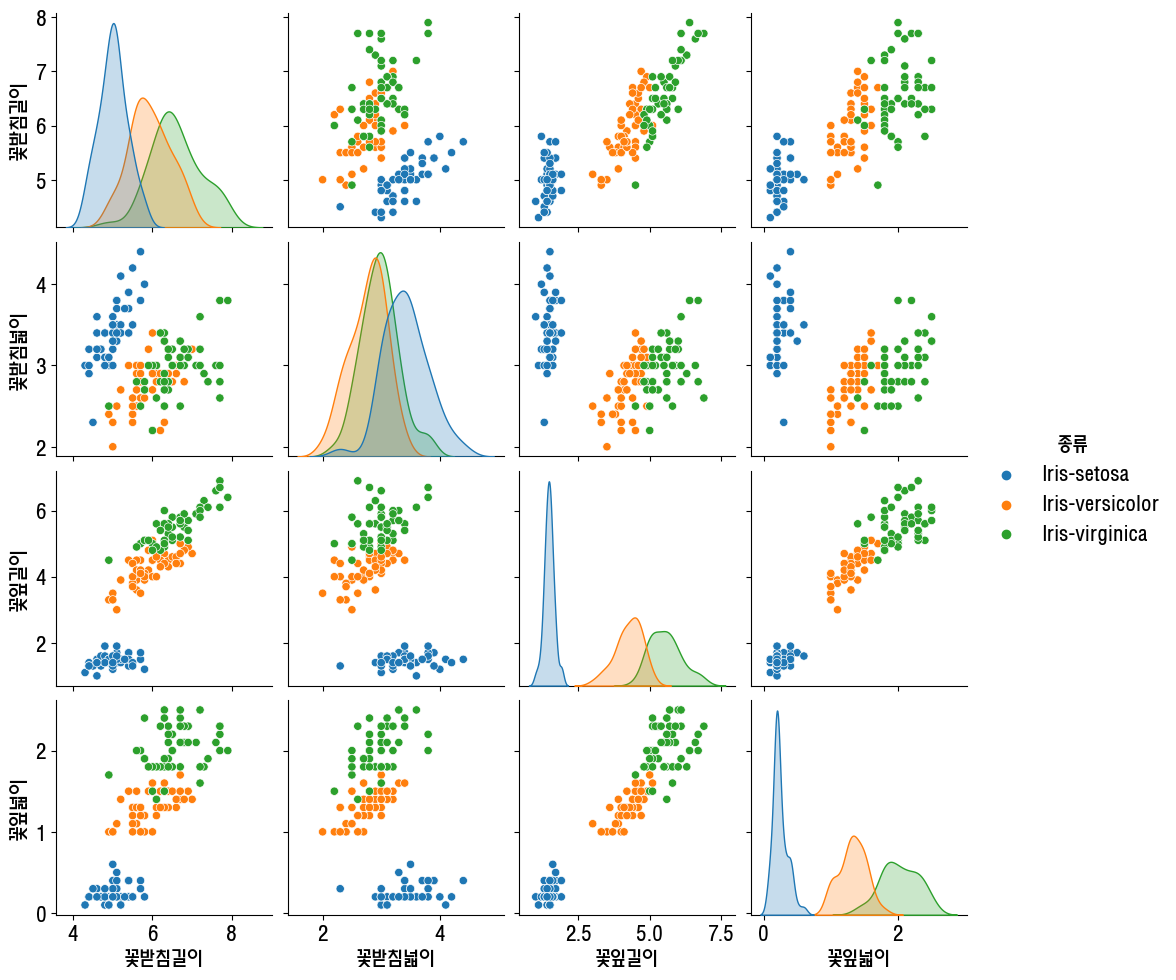

In [6]:
#한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\HMFMMUEX.TTC"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14) 

#seaborn에서 제공하는 pairplot() 함수 사용
sns.pairplot(df, hue='종류')  #상관도 그래프
#sns.pairplot(df, hue='종류', palette="husl")

plt.show()

### 2) pandas에서 제공하는 함수를 활용하여 데이터 분석 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침넓이   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎넓이    150 non-null    float64
 4   종류      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['종류'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.head(5)

꽃받침길이  꽃받침넓이  꽃잎길이  꽃잎넓이           종류
0    5.1    3.5   1.4   0.2  Iris-setosa
1    4.9    3.0   1.4   0.2  Iris-setosa
2    4.7    3.2   1.3   0.2  Iris-setosa
3    4.6    3.1   1.5   0.2  Iris-setosa
4    5.0    3.6   1.4   0.2  Iris-setosa

In [10]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

<span style="color:blue;  font-weight:bold; font-size:160%"> 4. 딥러닝을 위해 (x) 속성과 (y) 클래스로 데이터 분리  </span>     

In [11]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

In [12]:
# X

In [13]:
Y_obj

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<span style="color:blue;  font-weight:bold; font-size:160%"> 5. (y) 클래스를 ONE-HOT 인코딩 처리   </span>    

### 1) 텍스트 형식의 (y) 클래스를 숫자로 변환

In [14]:
# 문자열 클래스를 숫자로 변환
# from sklearn.preprocessing import LabelEncoder으로 부터 제공됨

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [15]:
Y  # 클래스를 숫자로 레이블링함

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2) 숫자로 변환된 클래스를 ONE-HOT 인코딩 처리

In [16]:
Y_encoded = tf.keras.utils.to_categorical(Y)  # ONE-HOT 인코딩으로 변환 

In [17]:
Y_encoded  # ONE-HOT 인코딩으로 변환된 값 출력 (accuracy 계산시 일반적으로 원핫인코딩 방식을 사용하므로 원핫인코딩함)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
len(Y_encoded)

150

<span style="color:blue;  font-weight:bold; font-size:160%"> 6. 데이터셋을 training 데이터셋과 test 데이터셋으로 분리 </span>   

In [19]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

from sklearn.model_selection import train_test_split 

# 트레이닝 데이터셋 : 70%, 테스트 데이터셋 : 30% / 클래스는 원핫인코딩된 Y_encoded 를 사용
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [20]:
len(X_train)   # 트레이닝 데이터셋 70% : 105개

105

In [21]:
len(X_test)   # 테스트 데이터셋 305 : 45개  (validation data)

45

In [22]:
print("전체 데이터 개수 : ", len(X))
print("전체 트레이닝 데이터 개수 : ", len(X_train))
print("전체 테스트 데이터 개수 : ", len(X_test)) 

전체 데이터 개수 :  150
전체 트레이닝 데이터 개수 :  105
전체 테스트 데이터 개수 :  45


<span style="color:blue;  font-weight:bold; font-size:160%"> 7. 딥러닝 모델링  </span> 

<span style="color:magenta;  font-weight:bold; font-size:160%"> ● Keras TensorBoard 결과를 기록할 로그 디렉토리 생성   </span>    

In [23]:
from datetime import datetime

In [24]:
datetime.now()

datetime.datetime(2022, 11, 27, 11, 18, 31, 561341)

In [25]:
datetime.now().strftime("%Y%m%d-%H%M%S") 

'20221127-111831'

In [26]:
logdir="logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S") # 현재 날짜 및 시각으로 디렉토리 이름으로 로그 디렉토리 생성 

In [27]:
logdir  # 로그 디렉토리 

'logs\\20221127-111832'

<span style="color:magenta;  font-weight:bold; font-size:160%"> ● Keras TensorBoard  콜백을 정의 </span>    

다른 코드의 인수로서 넘겨주는 실행 가능한 코드를 말한다.   
콜백을 넘겨받는 코드는 이 콜백을 필요에 따라 즉시 실행할 수도 있고, 아니면 나중에 실행할 수도 있다.

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

### 1) 모델 설정 :  Activation function으로 softmax를 활용한 모델 설정 

In [29]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(16, input_dim=4, activation='relu'),     
    tf.keras.layers.Dense(3, 'softmax')])    

### 2) 모델 컴파일  :  loss='categorical_crossentropy'를 사용한 모델 컴파일

In [30]:
# softmax의 경우 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
#loss='categorical_crossentropy'는 범주형 교차 엔트로피 (3개이상의 분류에서 사용)

<span style="color:blue; font-weight:bold; font-size:140%"> 3) 모델 실행  :  training 데이터셋 105개로 트레이닝, test 데이터셋 45개를 validation 데이터셋으로 사용   </span> 

<span style="color:magenta;  font-weight:bold; font-size:160%"> ●model.fit 부분에 callbacks=[tensorboard_callback] 사용 </span>    

In [31]:
# training 데이터셋 105개를 트레이닝에 사용하면서 이어서 test 데이터셋 45개를 validation 용도로 사용 
# loss, accuracy, val_loss, val_accuracy 정보를 그래프 그리기 위해서 hist_2에 할당 

hist_2 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, callbacks=[tensorboard_callback])


Epoch 1/100
4/4 [==============================] - 1s 179ms/step - loss: 1.8817 - accuracy: 0.3714 - val_loss: 2.2090 - val_accuracy: 0.2444
Epoch 2/100
4/4 [==============================] - 0s 68ms/step - loss: 1.7977 - accuracy: 0.3714 - val_loss: 2.1001 - val_accuracy: 0.2444
Epoch 3/100
4/4 [==============================] - 0s 51ms/step - loss: 1.7131 - accuracy: 0.3714 - val_loss: 1.9947 - val_accuracy: 0.2444
Epoch 4/100
4/4 [==============================] - 0s 56ms/step - loss: 1.6355 - accuracy: 0.3714 - val_loss: 1.8932 - val_accuracy: 0.2444
Epoch 5/100
4/4 [==============================] - 0s 56ms/step - loss: 1.5549 - accuracy: 0.3714 - val_loss: 1.7984 - val_accuracy: 0.2444
Epoch 6/100
4/4 [==============================] - 0s 57ms/step - loss: 1.4870 - accuracy: 0.3714 - val_loss: 1.7079 - val_accuracy: 0.2444
Epoch 7/100
4/4 [==============================] - 0s 54ms/step - loss: 1.4187 - accuracy: 0.3714 - val_loss: 1.6231 - val_accuracy: 0.2444
Epoch 8/100
4/4 [==

In [32]:
hist_2 # 콜백

<span style="color:magenta;  font-weight:bold; font-size:160%"> ● cmd 창에서 Keras TensorBoard 확인하는 방법</span>   

In [33]:
import os
os.getcwd()

'D:\\ai\\●●2022_2_LECTURE\\21_Coding_Files'

<span style="color:blue;  font-weight:bold; font-size:120%"> 아래의 명령어를 참고로 현재 코딩 중인 작업 디렉토리로 이동 </span>

예시) 
현재 작업 디렉토리 D:\\ai\\●●2022_2_LECTURE\\21_Coding_Files 라고 가정

(base) C:\Users\ai04>D:

(base) D:\>

(base) D:\>cd ai\●●2022_2_LECTURE\21_Coding_Files

In [34]:
logdir

'logs\\20221127-111832'

<span style="color:blue;  font-weight:bold; font-size:120%"> 아래의 명령어에서 20221120-214602 부분은 위에서 설정한 logs 디렉토리로 변경
    
(base) D:\AI\●●2022_2_LECTURE\21_Coding_Files>tensorboard --logdir=.\logs\20221127-103648\  

<span style="color:blue;  font-weight:bold; font-size:120%"> 아래와 같은 문구가 나오면 http://부분(http://localhost:6006/) 을 카피하여 
chrome 주소 입력 부분에 넣어서 확인

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all  
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)

<span style="color:magenta;  font-weight:bold; font-size:160%"> ● TensorBoard 결과 해석 </span>   

Kernel은 layer에서 정해진 weight matrix   
bias는 layer에서 정해진 bias 

<span style="color:blue;  font-weight:bold; font-size:160%"> 8. 딥러닝 평가  </span> 

In [34]:
# 모델 평가

loss, acc = model.evaluate(x=X_test, y=Y_test, verbose=0) # 45개의 test 데이터셋 결과 
print("Evaluate with test dataset : Loss = {:.4f}".format(loss))      # test데이터셋의 loss 
print("Evaluate with test dataset : Accuracy = {:.4f}".format(acc))  # test 데이터셋의 accuracy


Evaluate with test dataset : Loss = 1.4087
Evaluate with test dataset : Accuracy = 0.2444


In [35]:
# 트레이닝 모델 요약 정보
model.summary()

# Param의 의미 :  ((input 노드 개수) *(은닉층 또는 출력층의 노드의 수)) + (은닉층 또는 출력층의 노드의 수)
#  Param           (4 * 16)  + 16  = 80
#  Param           (16 * 3)  +  3  = 51
#  Total params             sum   = 131

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### (방식 2) 딥러닝 결과 visualization - Loss and Accuracy

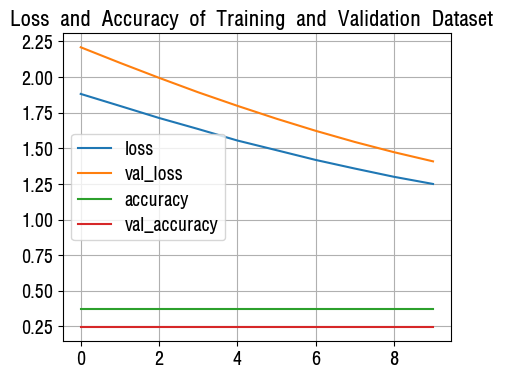

In [36]:
plt.rc('font', family=font_name, size=12) 
plt.figure(figsize=(5,4))
plt.title('Loss and Accuracy of Training and Validation Dataset ', fontsize=14)

# 위에서 아래와 같이 모델을 실행했었다. 
# 트레이닝 데이터셋 105개를 트레이닝에 사용하고, 테스트 데이터셋 45개는 검증을 위한 테스트에 사용한다.
# loss, accuracy, val_loss, val_accuracy 정보를 그래프 그리기 위해서 hist에 할당
# hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=2)
# loss, accuracy, val_loss, val_accuracy 정보를 획득한 상태 

plt.plot(hist_2.history['loss'])      # 트레이닝 데이터셋의 loss   -> loss 
plt.plot(hist_2.history['val_loss'])  # 테스트 데이터셋의 loss -> val_loss

plt.plot(hist_2.history['accuracy'])      # 트레이닝 데이터셋의 accuracy    -> accuracy 
plt.plot(hist_2.history['val_accuracy'])  # 테스트 데이터셋의 accuracy  -> val_accuracy 

plt.legend(['loss','val_loss','accuracy', 'val_accuracy' ])     # 범례
plt.grid()
plt.show()

### (방식 2) 딥러닝 결과 visualization - Loss

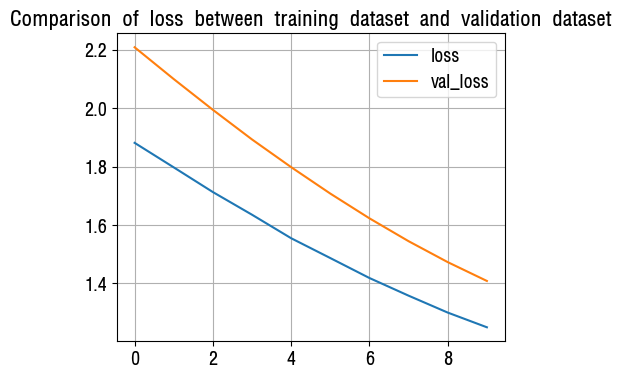

In [37]:
plt.figure(figsize=(5,4))
plt.title('Comparison of loss between training dataset and validation dataset', fontsize=14)
plt.plot(hist_2.history['loss'])      # 트레이닝 데이터셋의 정확도
plt.plot(hist_2.history['val_loss'])  # 테스트 데이터셋의 정확도
plt.legend(['loss','val_loss']) # 범례
plt.grid()
plt.show()

### (방식 2) 딥러닝 결과 visualization - Accuracy

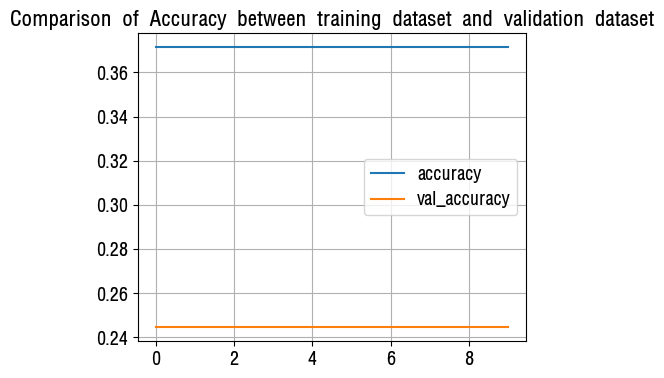

In [38]:
plt.figure(figsize=(5,4))
plt.title('Comparison of Accuracy between training dataset and validation dataset', fontsize=14)
plt.plot(hist_2.history['accuracy'])      # 트레이닝 데이터셋의 정확도
plt.plot(hist_2.history['val_accuracy'])  # 테스트 데이터셋의 정확도
plt.legend(['accuracy','val_accuracy']) # 범례
plt.grid()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:160%"> 9. 아이리스 품종 예측  </span> 

### 아이리스 품종 예측 : model.predict을 활용한 임의의 데이터를 넣어서 아이리스 품종을 예측

In [39]:
name = ['veginica', 'setosa', 'vesicolor']

In [40]:
test_iris_1 = np.array([[5, 2.9, 1, 0.2]])  #꽃받침길이, 꽃받침넓이, 꽃잎길이, 꽃잎넓이 
print(test_iris_1)
print(np.shape(test_iris_1))

predictions = np.argmax(model.predict(test_iris_1, verbose=0), axis=-1) #axis = -1 은 shape을 기반으로 가장 낮은 차원(1차원)에 전달함

print(predictions, type(predictions))
print(predictions[0], type(predictions[0]))
print(name[predictions[0]], type(name[predictions[0]]))

[[5.  2.9 1.  0.2]]
(1, 4)
[2] <class 'numpy.ndarray'>
2 <class 'numpy.int64'>
vesicolor <class 'str'>


In [41]:
test_iris_2 = np.array([[7, 3.0, 5, 1.4]])   #꽃받침길이, 꽃받침넓이, 꽃잎길이, 꽃잎넓이 
print(test_iris_2)
print(np.shape(test_iris_2))

predictions = np.argmax(model.predict(test_iris_2, verbose=0), axis=-1) #axis = -1 은 shape을 기반으로 가장 낮은 차원(1차원)에 전달함

print(predictions, type(predictions))
print(predictions[0], type(predictions[0]))
print(name[predictions[0]], type(name[predictions[0]]))

[[7.  3.  5.  1.4]]
(1, 4)
[2] <class 'numpy.ndarray'>
2 <class 'numpy.int64'>
vesicolor <class 'str'>


In [42]:
test_iris_3 = np.array([[6.2, 3.4, 5.4, 2.3]])   #꽃받침길이, 꽃받침넓이, 꽃잎길이, 꽃잎넓이 
print(test_iris_3)
print(np.shape(test_iris_3))

predictions = np.argmax(model.predict(test_iris_3, verbose=0), axis=-1) #axis = -1 은 shape을 기반으로 가장 낮은 차원(1차원)에 전달함

print(predictions, type(predictions))
print(predictions[0], type(predictions[0]))
print(name[predictions[0]], type(name[predictions[0]]))

[[6.2 3.4 5.4 2.3]]
(1, 4)
[2] <class 'numpy.ndarray'>
2 <class 'numpy.int64'>
vesicolor <class 'str'>
